In [ ]:
!unzip dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/dataset/training_set/dogs/dog.1901.jpg  
  inflating: dataset/dataset/training_set/dogs/dog.1902.jpg  
  inflating: dataset/dataset/training_set/dogs/dog.1903.jpg  
  inflating: dataset/dataset/training_set/dogs/dog.1904.jpg  
  inflating: dataset/dataset/training_set/dogs/dog.1905.jpg  
  inflating: dataset/dataset/training_set/dogs/dog.1906.jpg  
  inflating: dataset/dataset/training_set/dogs/dog.1907.jpg  
  inflating: dataset/dataset/training_set/dogs/dog.1908.jpg  
  inflating: dataset/dataset/training_set/dogs/dog.1909.jpg  
  inflating: dataset/dataset/training_set/dogs/dog.191.jpg  
  inflating: dataset/dataset/training_set/dogs/dog.1910.jpg  
  inflating: dataset/dataset/training_set/dogs/dog.1911.jpg  
  inflating: dataset/dataset/training_set/dogs/dog.1912.jpg  
  inflating: dataset/dataset/training_set/dogs/dog.1913.jpg  
  inflating: dataset/dataset/training_set/dogs/dog.1914.jpg  
  inflating: dataset

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from zipfile import ZipFile 

In [ ]:
# importing libraries for Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
test_dir="/content/dataset/dataset/test_set"
train_dir="/content/dataset/dataset/training_set"

train_dir_cats = train_dir + '/cats'
train_dir_dogs = train_dir + '/dogs'
test_dir_cats = test_dir + '/cats'
test_dir_dogs = test_dir + '/dogs'

In [ ]:
print('number of cats training images - ',len(os.listdir(train_dir_cats)))
print('number of dogs training images - ',len(os.listdir(train_dir_dogs)))
print('number of cats testing images - ',len(os.listdir(test_dir_cats)))
print('number of dogs testing images - ',len(os.listdir(test_dir_dogs)))

number of cats training images -  4000
number of dogs training images -  4000
number of cats testing images -  1000
number of dogs testing images -  1000


Now we need to convert the RGB images into array of numbers. The requirement can be satisfied by ImageDataGenerator() https://keras.io/preprocessing/image/

In [ ]:
data_generator = ImageDataGenerator(rescale = 1.0/255.0, zoom_range = 0.2)

In [ ]:
batch_size = 32
training_data = data_generator.flow_from_directory(directory = train_dir,
                                                   target_size = (64, 64),
                                                   batch_size = batch_size,
                                                   class_mode = 'binary')
testing_data = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (64, 64),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
# preparing the layers in the Convolutional Deep Neural Network
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = training_data.image_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.1))
model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate = 0.15))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(units = len(set(training_data.classes)), activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [ ]:
fitted_model = model.fit(training_data,
                        steps_per_epoch = 200,
                        epochs = 40,
                        validation_data = testing_data,
                        validation_steps = 200)

Epoch 1/40
200/200 [==============================] - 83s 416ms/step - loss: 0.6914 - accuracy: 0.5256 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 2/40
200/200 [==============================] - 72s 362ms/step - loss: 0.6826 - accuracy: 0.5550
Epoch 3/40
200/200 [==============================] - 72s 361ms/step - loss: 0.6566 - accuracy: 0.6119
Epoch 4/40
200/200 [==============================] - 72s 359ms/step - loss: 0.6337 - accuracy: 0.6488
Epoch 5/40
200/200 [==============================] - 73s 363ms/step - loss: 0.6159 - accuracy: 0.6722
Epoch 6/40
200/200 [==============================] - 72s 360ms/step - loss: 0.5825 - accuracy: 0.6933
Epoch 7/40
200/200 [==============================] - 72s 362ms/step - loss: 0.5523 - accuracy: 0.7231
Epoch 8/40
200/200 [==============================] - 76s 382ms/step - loss: 0.5354 - accuracy: 0.7233
Epoch 9/40
200/200 [==============================] - 72s 361ms/step - loss: 0.5234 - accuracy: 0.7377
Epoch 10/40
200/200 [==========

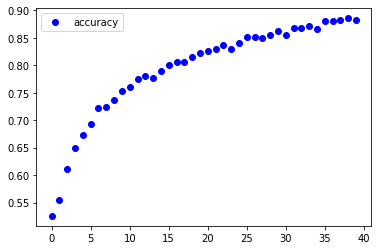

In [ ]:
accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')
plt.legend()

In [ ]:
# testing the model
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][0]  == 1:
        prediction = 'Cat'
    else:
        prediction = 'Dog'
    return prediction

In [ ]:
trial_dir_images = "/content/dataset/dataset/trial/test"
random_image = np.random.randint(0, len(os.listdir(trial_dir_images)))
random_image
final_dir = trial_dir_images + '/animal ('+ str(random_image) +').jpg'
print(testing_image(final_dir))

[[0. 1.]]
Dog


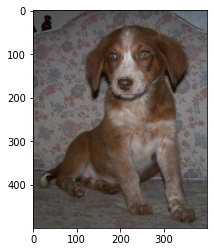

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread(final_dir)
imgplot = plt.imshow(img)
plt.show()

Saving the Model for further use

In [ ]:
from keras.models import load_model
model.save('High_Accuracy_Model.h5')

Reloading the prefitted model

In [ ]:
model = load_model('High_Accuracy_Model.h5')